# Deep Learning Exercise #1 _ Hadas Halperin: 315679225 & Chernet Maru: 327441440


### Installing packages, list installed packages, upgrade package.

In [9]:
!pip install tensorflow

In [10]:
!pip install matplotlib

In [8]:
!pip install sklearn

In [1]:
!pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


### importing libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import keras
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix


### Extracting Files From Folders and Number Length Validation

In [5]:
Read_from_path = r'C:\Users\Hadasidoku\Desktop\deep learning project\chest_xray\chest_xray' #Files are instored internally

Read_Train_Folder = os.path.join(Read_from_path, 'train')
Read_Validation_Folder = os.path.join(Read_from_path, 'val')
Read_Test_Folder = os.path.join(Read_from_path, 'test')

#Extract the path of Positive and Negative Folders of Train and Test (we want to devide later the train to validation&train)
Read_Pos_Train_Folder = os.path.join(Read_Train_Folder, 'PNEUMONIA')
Read_Neg_Train_folder = os.path.join(Read_Train_Folder, 'NORMAL')
Read_Pos_Test_folder = os.path.join(Read_Test_Folder, 'PNEUMONIA')
Read_Neg_Test_folder = os.path.join(Read_Test_Folder, 'NORMAL')

# Extracting file's names from path 
Train_Pneumonia_Files = os.listdir(Read_Pos_Train_Folder)
Train_Normal_Files = os.listdir(Read_Neg_Train_folder)
Test_Pneumonia_Files = os.listdir(Read_Pos_Test_folder)
Test_Normal_Files = os.listdir(Read_Neg_Test_folder)

# How many files do we have? 
print ("In train folder we have",len(Train_Normal_Files),"normal pictures", "and Pneumonia:" , len(Train_Pneumonia_Files),"pictures")
print ("In test folder we have ",len(Test_Normal_Files), "pictures, and as for Pneumonia:" , len(Test_Pneumonia_Files),"pictures")
print("So, in train folder we have in total: ", len(Train_Pneumonia_Files+Train_Normal_Files))
print("and in test folder we have in total:", len(Test_Pneumonia_Files+Test_Normal_Files))

In train folder we have 1341 normal pictures and Pneumonia: 3875 pictures
In test folder we have  234 pictures, and as for Pneumonia: 390 pictures
So, in train folder we have in total:  5216
and in test folder we have in total: 624


### Section number A

In [14]:
BATCH_SIZE=20

# Normalization

Train_Normalize = ImageDataGenerator(rescale=1./255)
Test_Normalize = ImageDataGenerator(rescale=1./255)
Val_Normalize = ImageDataGenerator(rescale=1./255)

# Redefine names
train_directory=Read_Train_Folder
test_directory=Read_Test_Folder
val_directory=Read_Validation_Folder



# Deviding the training folder to train & validation
train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='training')
    
val_data = tf.keras.utils.image_dataset_from_directory(
    train_directory, seed=3, validation_split=0.1, subset='validation')

# resizing and dividing to batches
Train_Data=Train_Normalize.flow_from_directory(train_directory, target_size=(224,224),class_mode='binary', batch_size= BATCH_SIZE, color_mode='grayscale')
Test_Data=Test_Normalize.flow_from_directory(test_directory, target_size=(224,224),class_mode='binary',batch_size= BATCH_SIZE, color_mode='grayscale')
Val_Data=Val_Normalize.flow_from_directory(val_directory, target_size=(224,224),class_mode='binary', batch_size= 2, color_mode='grayscale')

# Validate the shape and batch size
print('Image shape is: ',Test_Data.image_shape)
print('Train batch size is',len(Train_Data))
print('Test batch size is',len(Test_Data))
print("Classes list: ",Train_Data.class_indices)
print("Number of classes model is : ",Train_Data.num_classes)

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Image shape is:  (224, 224, 1)
Train batch size is 261
Test batch size is 32
Classes list:  {'NORMAL': 0, 'PNEUMONIA': 1}
Number of classes model is :  2


### Model Configuration

In [12]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Flatten(input_shape=(224,224,1)))
model.add(layers.Dense(64, activation='relu', name='Dense1'))
model.add(layers.Dense(64, activation='relu', name='Dense2'))
model.add(layers.Dense(64, activation='relu', name='Dense3'))
model.add(layers.Dense(32, activation='elu', name='Dense4'))
model.add(layers.Dense(1, activation='sigmoid', name='Dense5'))
model.summary()

Model: "my_sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 Dense1 (Dense)              (None, 64)                3211328   
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 Dense3 (Dense)              (None, 64)                4160      
                                                                 
 Dense4 (Dense)              (None, 32)                2080      
                                                                 
 Dense5 (Dense)              (None, 1)                 33        
                                                                 
Total params: 3,221,761
Trainable params: 3,221,761
N

In [17]:
model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-6), metrics=['accuracy'])

### Section number B

In [16]:
epochs = 70
model_fit = model.fit(Train_Data,validation_data = Val_Data, epochs=epochs, batch_size=BATCH_SIZE )

Epoch 1/70
261/261 [==============================] - 125s 472ms/step - loss: 0.5161 - accuracy: 0.7488 - val_loss: 0.7505 - val_accuracy: 0.5000
Epoch 2/70
261/261 [==============================] - 97s 372ms/step - loss: 0.4033 - accuracy: 0.8282 - val_loss: 0.6359 - val_accuracy: 0.6250
Epoch 3/70
261/261 [==============================] - 98s 374ms/step - loss: 0.3464 - accuracy: 0.8763 - val_loss: 0.5999 - val_accuracy: 0.6875
Epoch 4/70
261/261 [==============================] - 97s 373ms/step - loss: 0.3095 - accuracy: 0.8949 - val_loss: 0.6049 - val_accuracy: 0.6875
Epoch 5/70
261/261 [==============================] - 96s 368ms/step - loss: 0.2830 - accuracy: 0.9049 - val_loss: 0.5981 - val_accuracy: 0.6875
Epoch 6/70
261/261 [==============================] - 97s 372ms/step - loss: 0.2639 - accuracy: 0.9105 - val_loss: 0.5281 - val_accuracy: 0.8125
Epoch 7/70
261/261 [==============================] - 97s 371ms/step - loss: 0.2472 - accuracy: 0.9193 - val_loss: 0.5416 - val_a

Epoch 57/70
261/261 [==============================] - 42s 160ms/step - loss: 0.1088 - accuracy: 0.9618 - val_loss: 0.3601 - val_accuracy: 0.8125
Epoch 58/70
261/261 [==============================] - 42s 162ms/step - loss: 0.1081 - accuracy: 0.9638 - val_loss: 0.2553 - val_accuracy: 0.9375
Epoch 59/70
261/261 [==============================] - 42s 161ms/step - loss: 0.1072 - accuracy: 0.9615 - val_loss: 0.2993 - val_accuracy: 0.8750
Epoch 60/70
261/261 [==============================] - 42s 163ms/step - loss: 0.1063 - accuracy: 0.9632 - val_loss: 0.2846 - val_accuracy: 0.8750
Epoch 61/70
261/261 [==============================] - 42s 161ms/step - loss: 0.1061 - accuracy: 0.9628 - val_loss: 0.2476 - val_accuracy: 0.9375
Epoch 62/70
261/261 [==============================] - 42s 163ms/step - loss: 0.1050 - accuracy: 0.9622 - val_loss: 0.2479 - val_accuracy: 0.9375
Epoch 63/70
261/261 [==============================] - 42s 161ms/step - loss: 0.1056 - accuracy: 0.9620 - val_loss: 0.3013 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


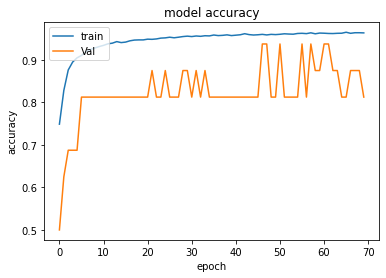

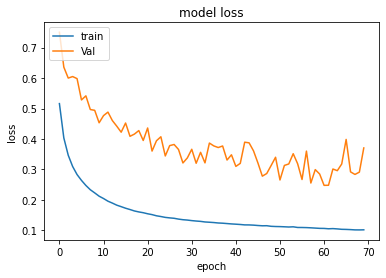

In [18]:
print(model_fit.history.keys())
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

### Section number C

In [19]:
Predictions_First_Model = model.predict(Test_Data) 
y_Prediction_First = Predictions_First_Model > 0.5
y_True_First = Test_Data.classes 

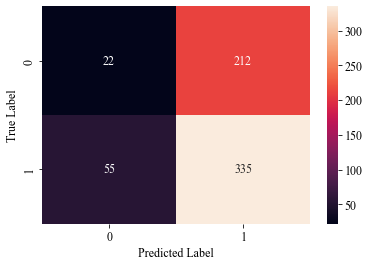

In [20]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_True_First, y_Prediction_First)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()



In [22]:
#Recall = TP / (TP + FN)
#precision = TP /(TP + FP)

recall = sklearn.metrics.recall_score(y_True_First, y_Prediction_First, pos_label=1)
print("Recall prob of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_True_First, y_Prediction_First, pos_label=1)
print("Precision prob of the model is:" ,precision)

Recall prob of model is: 0.8589743589743589
Precision prob of the model is: 0.6124314442413162


### Section number D

#### Defining a convolution model  - (model 2)

In [27]:
tf.keras.backend.clear_session()

In [23]:
num_classes = 1
input_shape = (224, 224, 1)
epochs = 70

SecondMod = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="sigmoid"), #sigmoid is ideal for classification problems
    ]
)

SecondMod.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dropout (Dropout)           (None, 200704)            0

In [24]:
# we use binary labels thus we need loss with binarycrosstropy
    
SecondMod.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-6), metrics=['accuracy'])

SecondMod_Fit = SecondMod.fit(Train_Data,validation_data = Val_Data, epochs = epochs ,batch_size = BATCH_SIZE)

Epoch 1/70
261/261 [==============================] - 150s 573ms/step - loss: 0.2235 - accuracy: 0.9062 - val_loss: 0.5497 - val_accuracy: 0.7500
Epoch 2/70
261/261 [==============================] - 149s 571ms/step - loss: 0.0966 - accuracy: 0.9636 - val_loss: 0.0972 - val_accuracy: 1.0000
Epoch 3/70
261/261 [==============================] - 148s 568ms/step - loss: 0.0662 - accuracy: 0.9743 - val_loss: 0.1100 - val_accuracy: 1.0000
Epoch 4/70
261/261 [==============================] - 148s 568ms/step - loss: 0.0528 - accuracy: 0.9791 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 5/70
261/261 [==============================] - 147s 564ms/step - loss: 0.0422 - accuracy: 0.9847 - val_loss: 0.1299 - val_accuracy: 0.9375
Epoch 6/70
261/261 [==============================] - 148s 567ms/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.1172 - val_accuracy: 0.9375
Epoch 7/70
261/261 [==============================] - 149s 571ms/step - loss: 0.0241 - accuracy: 0.9904 - val_loss: 0.0657 -

Epoch 56/70
261/261 [==============================] - 204s 781ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0267 - val_accuracy: 1.0000
Epoch 57/70
261/261 [==============================] - 205s 786ms/step - loss: 0.0012 - accuracy: 0.9994 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 58/70
261/261 [==============================] - 205s 785ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 59/70
261/261 [==============================] - 205s 782ms/step - loss: 2.4072e-04 - accuracy: 1.0000 - val_loss: 0.0341 - val_accuracy: 1.0000
Epoch 60/70
261/261 [==============================] - 207s 790ms/step - loss: 8.0212e-05 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 61/70
261/261 [==============================] - 205s 784ms/step - loss: 1.7296e-04 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 1.0000
Epoch 62/70
261/261 [==============================] - 207s 793ms/step - loss: 6.2607e-05 - accuracy: 1.00

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


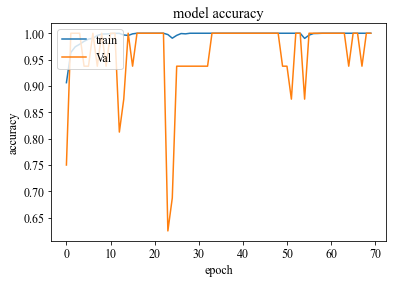

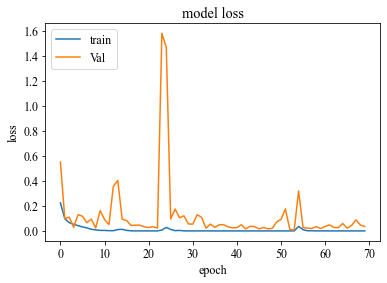

In [25]:
print(SecondMod_Fit.history.keys())
plt.plot(SecondMod_Fit.history['accuracy'])
plt.plot(SecondMod_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(SecondMod_Fit.history['loss'])
plt.plot(SecondMod_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

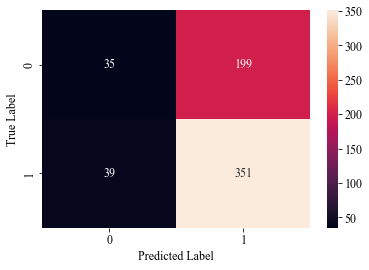

In [26]:
SecondMod_Prediction = SecondMod.predict(Test_Data) 
y_Prediction_Second = SecondMod_Prediction > 0.5
y_True_Second = Test_Data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_True_Second, y_Prediction_Second)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [28]:
import sklearn.metrics

recall = sklearn.metrics.recall_score(y_True_Second, y_Prediction_Second, pos_label=1)
print(" The recall of model is:" ,recall)

precision = sklearn.metrics.precision_score(y_True_Second, y_Prediction_Second, pos_label=1)
print("The precision of the model is:" ,precision)

 The recall of model is: 0.9
The precision of the model is: 0.6381818181818182


### Section number D - section B

### Define Data Augmantation 

In [29]:
#define image size and rescaling

IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              1)),
    layers.experimental.preprocessing.RandomRotation(0.2), #make our dataset bigger by choosing different random rotation
    layers.experimental.preprocessing.RandomZoom(0.2), # same with random zooms
  ]
)

In [ ]:
num_classes = 2
epochs = 70

Third_Model_CNN_Aug = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'), # define the layers with augmentation
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

Third_Model_CNN_Aug.compile(optimizer = Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
Third_Model_CNN_Aug_Fit=Third_Model_CNN_Aug.fit(Train_Data,validation_data = Val_Data, epochs=epochs, batch_size=BATCH_SIZE)  

Epoch 1/70
261/261 [==============================] - 166s 631ms/step - loss: 0.4554 - accuracy: 0.7920 - val_loss: 0.6630 - val_accuracy: 0.6250
Epoch 2/70
261/261 [==============================] - 167s 638ms/step - loss: 0.3142 - accuracy: 0.8650 - val_loss: 0.7074 - val_accuracy: 0.6250
Epoch 3/70
261/261 [==============================] - 162s 618ms/step - loss: 0.2638 - accuracy: 0.8917 - val_loss: 0.7483 - val_accuracy: 0.6250
Epoch 4/70
261/261 [==============================] - 171s 653ms/step - loss: 0.2530 - accuracy: 0.8936 - val_loss: 0.8676 - val_accuracy: 0.6250
Epoch 5/70
261/261 [==============================] - 163s 623ms/step - loss: 0.2443 - accuracy: 0.9005 - val_loss: 0.5177 - val_accuracy: 0.8125
Epoch 6/70
261/261 [==============================] - 162s 621ms/step - loss: 0.2475 - accuracy: 0.8957 - val_loss: 0.6258 - val_accuracy: 0.6875
Epoch 7/70
261/261 [==============================] - 163s 624ms/step - loss: 0.2341 - accuracy: 0.9020 - val_loss: 0.4885 -

In [ ]:
print(Third_Model_CNN_Aug_Fit.history.keys())
plt.plot(Third_Model_CNN_Aug_Fit.history['accuracy'])
plt.plot(Third_Model_CNN_Aug_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(Third_Model_CNN_Aug_Fit.history['loss'])
plt.plot(Third_Model_CNN_Aug_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

## Section E - changing the learning rate of Second Model from 1e-3 ==> 1e-5

In [ ]:
tf.keras.backend.clear_session()
num_classes = 1
input_shape = (224, 224, 1)
epochs = 70

SecondMod = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu" ,padding = "same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="sigmoid"), #sigmoid is ideal for classification problems
    ]
)

SecondMod.summary()


In [ ]:
SecondMod.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-5), metrics=['accuracy'])

SecondMod_Fit = SecondMod.fit(Train_Data,validation_data = Val_Data, epochs = epochs ,batch_size = BATCH_SIZE)


In [ ]:
print(SecondMod_Fit.history.keys())
plt.plot(SecondMod_Fit.history['accuracy'])
plt.plot(SecondMod_Fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()


# summarize history for loss

plt.plot(SecondMod_Fit.history['loss'])
plt.plot(SecondMod_Fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [ ]:

SecondMod_Prediction = SecondMod.predict(Test_Data) 
y_Prediction_Second = SecondMod_Prediction > 0.5
y_True_Second = Test_Data.classes 

import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_True_Second, y_Prediction_Second)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

